## PROYECTO MÓDULO 3: Optimización de Talento

#### A partir de un CSV con datos de trabajadores debemos tratar los datos siguiendo los siguientes pasos:

1. Averiguar por qué se han marchado las empleadas de la empresa.
2. Si queremos más información o pistas podemos preguntarle a Rocío
3. FASES: 
    1. Hacer un EDA
    2. Transformar los datos (limpieza de nulos, normalización, etc.)
    3. Visualización de datos (hacer gráficas en Python). 
    4. BONUS: Diseño de base de datos e insertar los datos en SQL. 
    5. BONUS: Creación de ETL, hacer funciones para automatizar el proceso. 
    6. Hacer una presentación:
        - **Introducción, objetivos, pasos y organización**
        - Parte central: **análisis de los gráficas, tablas...**
        - **¿Qué info podemos obtener de estos? ¿Consejos para la empresa? ¿Mejoras? ¿Encontramos correlación entre variables?**
        - **Retos y soluciones**
        - **Conclusiones**
4. Aplicar metodología Agile y Srum. **Rocío** va a ser la clienta final: **Product Owner**


### PARTE 4: VISUALIZACIÓN

In [1]:
#Importar librería
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
#Configuración de la visualización del DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#Lectura del CSV y transformación a DataFrame (df)
df=pd.read_csv("HR_RAW_v3.csv", index_col =0)
df.sample(5)

ID Desvinculado  Género  Edad  Año nac.  Estado civil  Nivel estudios  \
22       0       Activo   Mujer    36      1987  Divorciado/a               3   
250      0       Activo  Hombre    29      1994      Casado/a               1   
471   1951       Activo  Hombre    34      1989  Divorciado/a               4   
1202  1193       Activo  Hombre    19      2004     Soltero/a               2   
911    611       Activo  Hombre    29      1994  Divorciado/a               3   

     Área estudios      Frecuencia viaje  Distancia casa Teletrabajo  \
22            Otro              No viaja              12          Sí   
250       Medicina  Viaja frecuentemente              74          No   
471       Medicina       Viaja raramente              20          Sí   
1202          Otro       Viaja raramente              75          No   
911      Técnico/a       Viaja raramente              30          Sí   

               Jornada  Formaciones (últ. año)  Trabajos previos  Años activo  \
22    Jornada completa                       2                 1           17   
250   Jornada completa                       3                 1           11   
471   Jornada completa                       2                 1            9   
1202  Jornada completa                       4                 1            1   
911   Jornada completa                       2                 4            8   

      Antigüedad  Años desde ascenso  Años mismo jefe  \
22            17                  12                8   
250           11                   3               10   
471            8                   1                1   
1202           1                   0                0   
911            3                   1                2   

                    Departamento  Categoría                         Puesto  \
22                   Sin asignar          3         Representante de salud   
250   Investigación y desarrollo          1       Técnico/a de laboratorio   
471                  Sin asignar          3          Ejecutivo/a de ventas   
1202                 Sin asignar          1  Científico/a de investigación   
911                  Sin asignar          2       Director/a de producción   

     Horas extra  Evaluación  €/hora   €/día    €/mes  Ingreso mensual  \
22            No           3    59.0  1223.0   8202.0           4859.0   
250           No           3    40.0   574.0   7003.0           4859.0   
471           No           3    39.0  1239.0  22914.0           4859.0   
1202          No           3    54.0   645.0   7172.0           2552.0   
911           No           3    34.0   232.0  22645.0           4262.0   

      % aumento salario  Acciones empresa  Compromiso  Satisf. global  \
22                   13                 3           3               3   
250                  13                 0           3               4   
471                  18                 1           3               4   
1202                 25                 0           3               3   
911                  12                 2           3               4   

      Satisf. trabajo  Satisf. relaciones  Satisf. conciliación  
22                  3                   2                     3  
250                 4                   2                     4  
471                 3                   3                     2  
1202                1                   3                     3  
911                 4                   2                     4

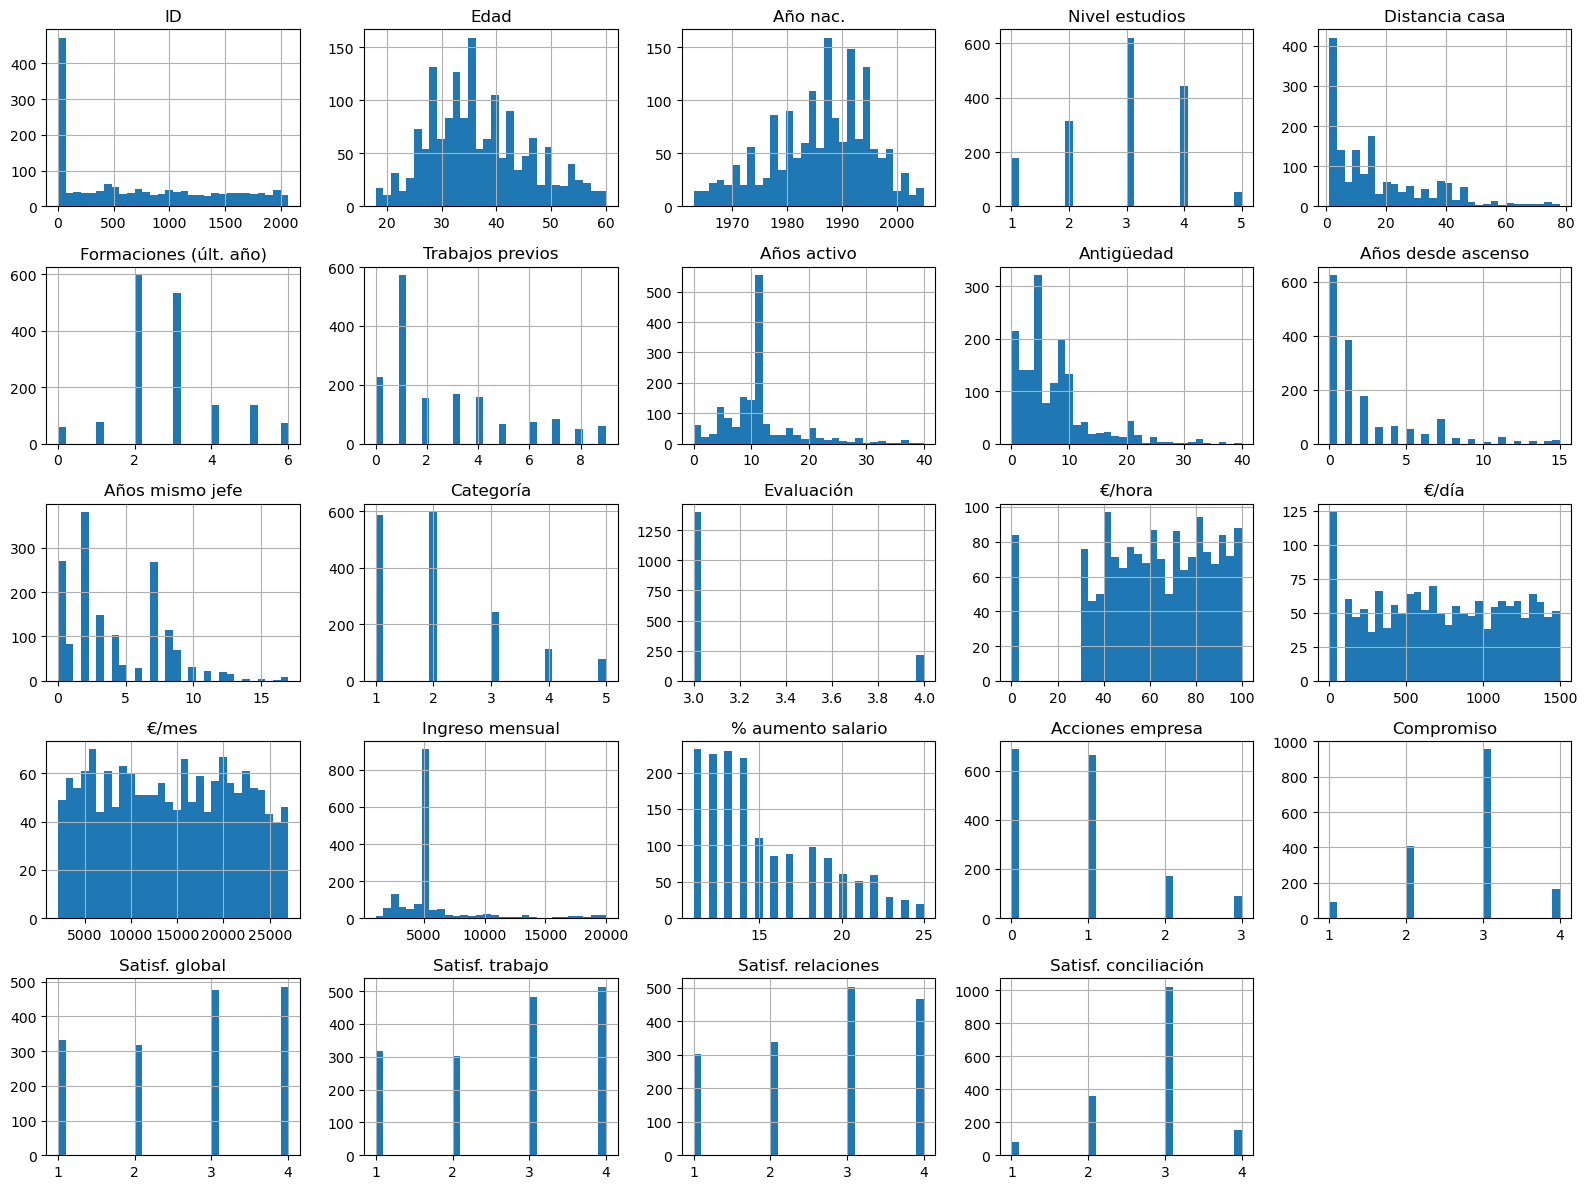

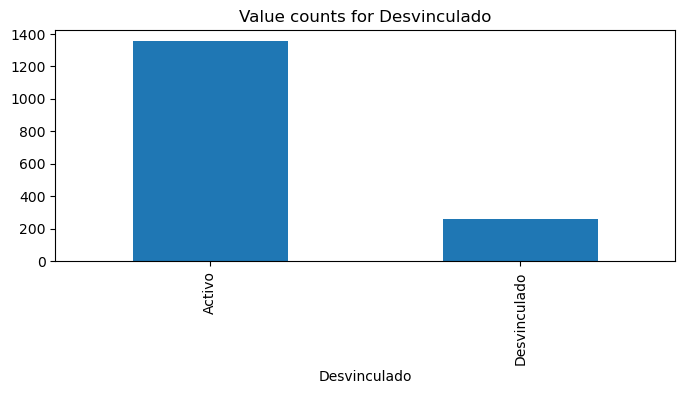

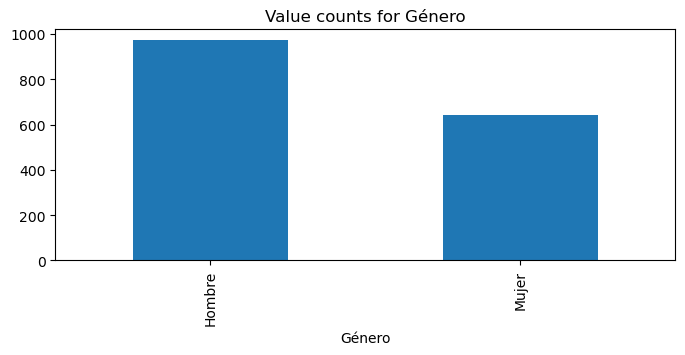

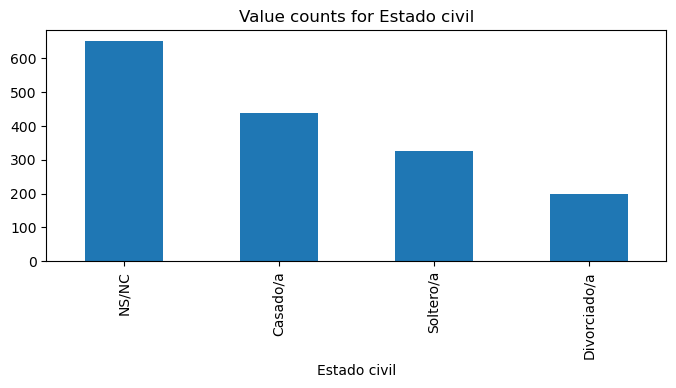

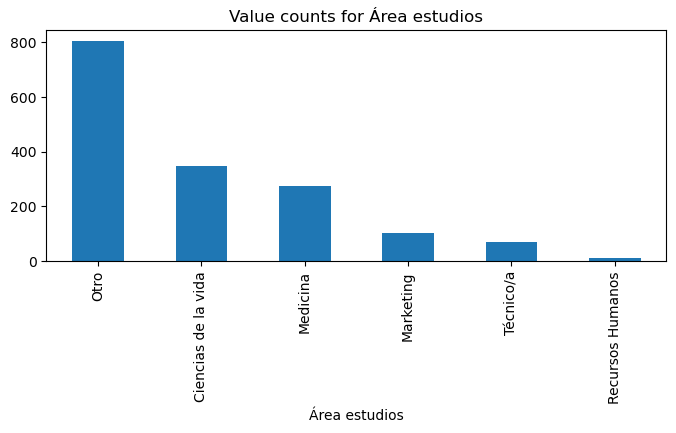

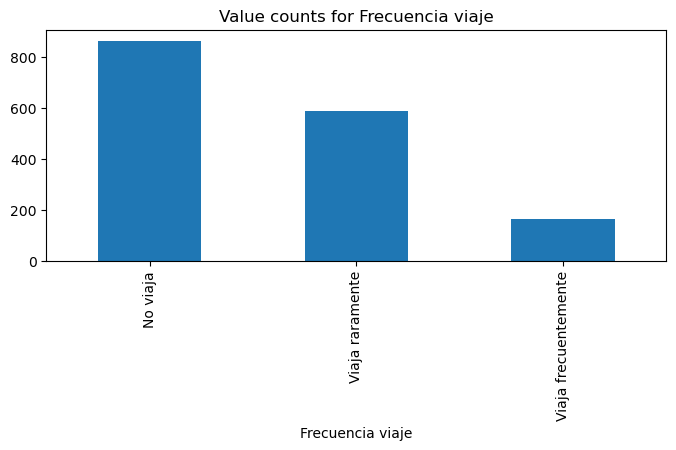

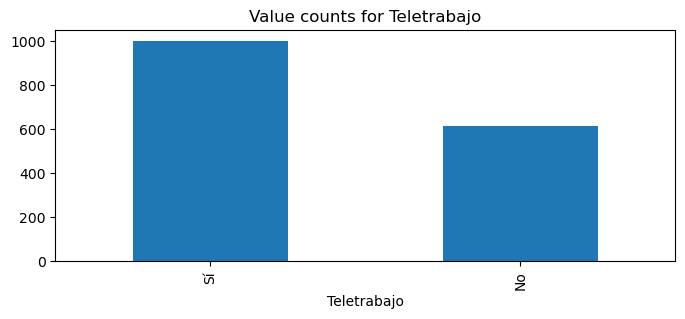

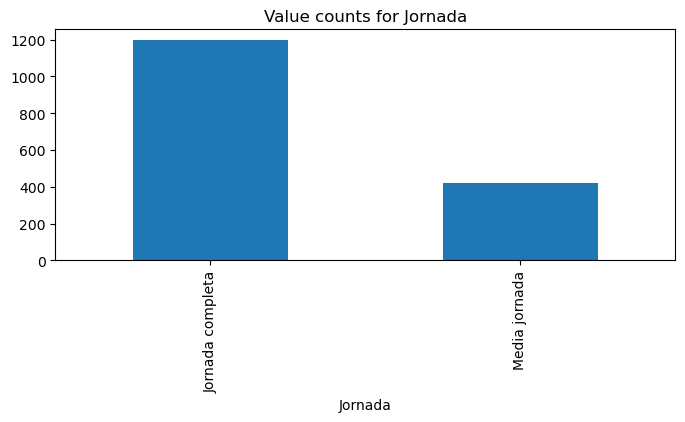

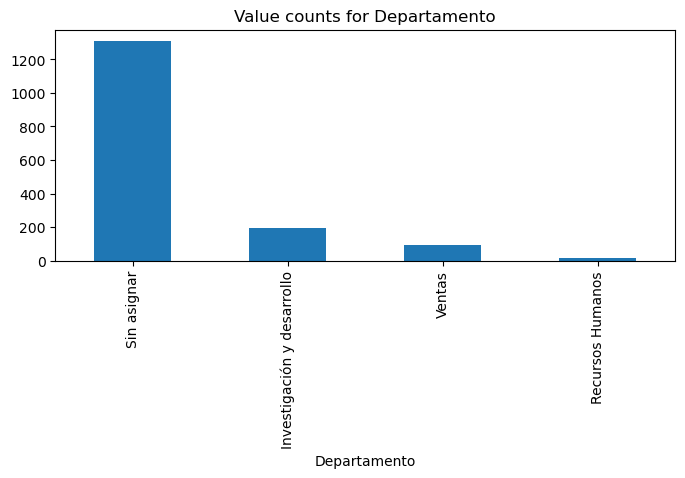

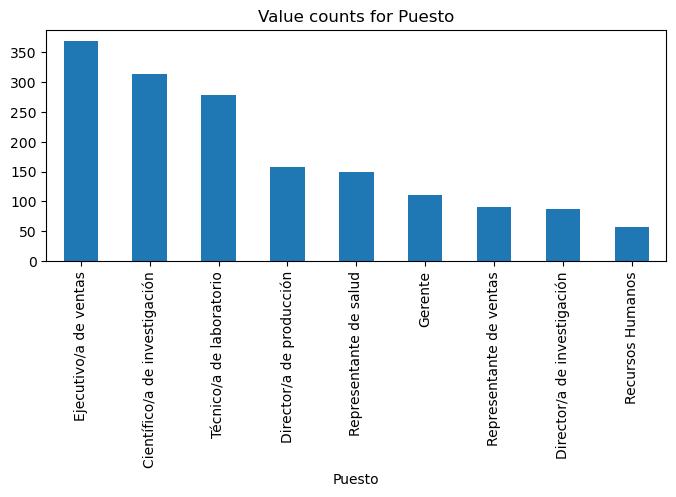

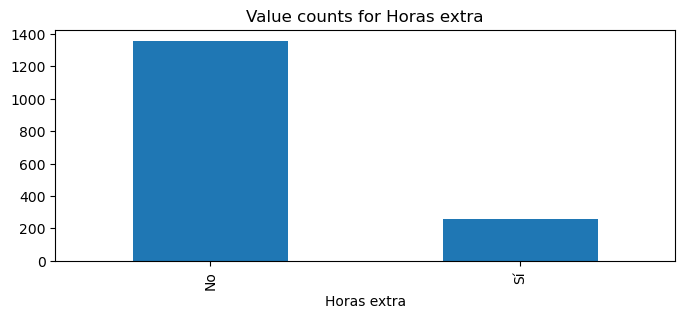

In [4]:
# Histograms for numeric columns
df.select_dtypes(include=[np.number]).hist(figsize=(16,12), bins=30)
plt.tight_layout()
plt.show()


# Bar plots for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8,3))
    df[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Value counts for {col}')
    plt.show()

    

🧠 1. ¿Se están yendo los empleados menos satisfechos?

Dejamos la consulta, ya que puede ser interesante analizar si las personas que se han ido son trabajadores que a la empresa le interesaba tener o no. 

* Consulta: ¿Se van quienes tienen alta evaluación, compromiso o satisfacción?
* Variables: desvinculado, nivel_compromiso, nivel_satisfaccion_global,nivel satisfaccion trabajo.
* ✅ Gráfico: Boxplot: Comparar niveles de desempeño/satisfacción entre empleados activos vs. desvinculados.
    
    



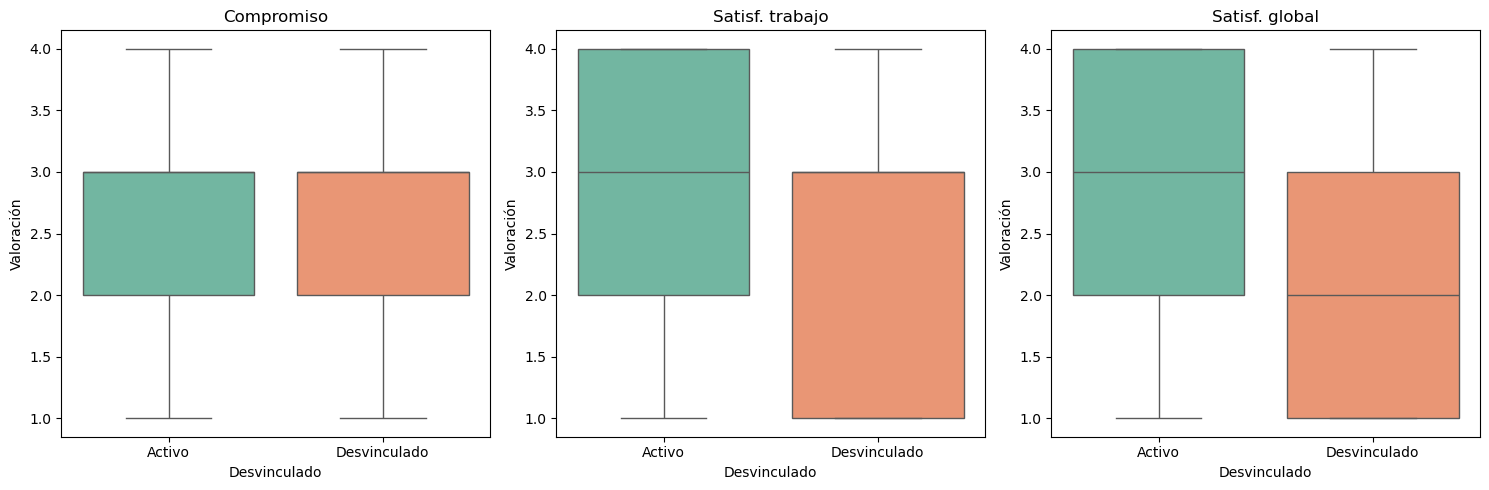

In [6]:
cols_valoracion = ['Compromiso', 'Satisf. trabajo', 'Satisf. global']
plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_valoracion):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Desvinculado', y=col, hue='Desvinculado', data=df, palette='Set2', legend=False)
    plt.title(f'{col.replace("_", " ").capitalize()}')
    plt.ylabel('Valoración')
plt.tight_layout()
plt.show()

💸 2. ¿Existe una brecha entre desempeño y compensación?

* Consulta: ¿Cobran menos quienes rinden más? ¿Se van?
* Variables: evaluacion_desempeño, ingreso_mensual, desvinculado
* ✅ Gráfico sugerido:
    * Scatterplot: evaluacion_desempeño vs. ingreso_mensual, coloreado por desvinculado.
    * Heatmap de correlaciones entre variables salariales y de desempeño.



In [55]:
df[['desvinculado','evaluacion_desempeño','ingreso_mensual']]

desvinculado  evaluacion_desempeño  ingreso_mensual
0              No                     3          19537.0
1              No                     3          19999.0
2              No                     3          19232.0
3              No                     3          17169.0
4              No                     3           4859.0
5              No                     3          17174.0
6              No                     3           4859.0
7              No                     4           4859.0
8              No                     3          16595.0
9              No                     3           4859.0
10             No                     4          19973.0
11             No                     3          13402.0
12             No                     3          13206.0
13            Yes                     3          19545.0
14             No                     3           4859.0
15             No                     3          18041.0
16            Yes                     3          19246.0
17             No                     4           4859.0
18             No                     3           4859.0
19             No                     3           4859.0
20             No                     4          10748.0
21             No                     3           4859.0
22             No                     3           4859.0
23             No                     3          16752.0
24             No                     3           6201.0
25             No                     4           4859.0
26            Yes                     3          19845.0
27             No                     3           4859.0
28             No                     3           4859.0
29             No                     3           4001.0
30             No                     3          10447.0
31             No                     4           4859.0
32             No                     3           4859.0
33             No                     3           4859.0
34             No                     3           4859.0
35             No                     4           4859.0
36             No                     4          16064.0
37             No                     3           3210.0
38             No                     3          10266.0
39             No                     4          10475.0
40             No                     3           6162.0
41             No                     3           4721.0
42             No                     3           4859.0
43            Yes                     3           4859.0
44             No                     4           4615.0
45             No                     3           4859.0
46             No                     4           4859.0
47             No                     3          16959.0
48             No                     3           4859.0
49             No                     3           4859.0
50             No                     3           4859.0
51             No                     3           4859.0
52            Yes                     3          10306.0
53             No                     3           4859.0
54             No                     3           4859.0
55             No                     4           5406.0
56             No                     3           4859.0
57             No                     3           4859.0
58             No                     3           5902.0
59             No                     3          10855.0
60             No                     3           5914.0
61             No                     3           4859.0
62             No                     3           6646.0
63             No                     4           4859.0
64             No                     3          13973.0
65             No                     3           4859.0
66             No                     3          13320.0
67             No                     4           4859.0
68             No                     4           4859.0
69             

In [56]:
df_ingreso= df.groupby('desvinculado')['ingreso_mensual'].mean().round(2)
df_ingreso

desvinculado
No     5788.42
Yes    4815.15
Name: ingreso_mensual, dtype: float64

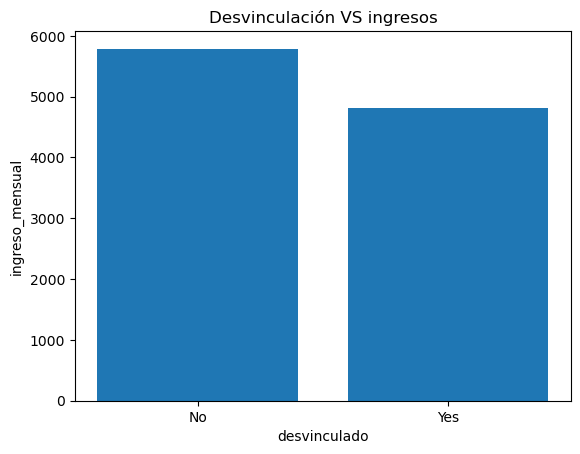

In [57]:
plt.bar(x=df_ingreso.index, height=df_ingreso.values)
plt.xlabel('desvinculado')
plt.ylabel('ingreso_mensual')
plt.title('Desvinculación VS ingresos')
plt.show()

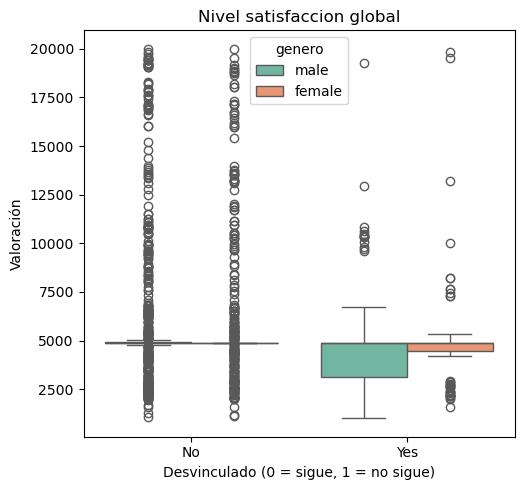

In [58]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, i + 1)
sns.boxplot(x='desvinculado', y='ingreso_mensual', hue='genero', data=df, palette='Set2', legend=True)
plt.title(f'{col.replace("_", " ").capitalize()}')
plt.xlabel('Desvinculado (0 = sigue, 1 = no sigue)')
plt.ylabel('Valoración')

plt.tight_layout()
plt.show()

🧭 3. ¿La movilidad interna reduce la desvinculación?

* Consulta: ¿Se quedan más quienes han sido promovidos o cambiaron de jefe?
* Variables: años_ultimo_ascenso, años_mismo_responsable, desvinculado
* ✅ Gráfico: gráfico de barras.


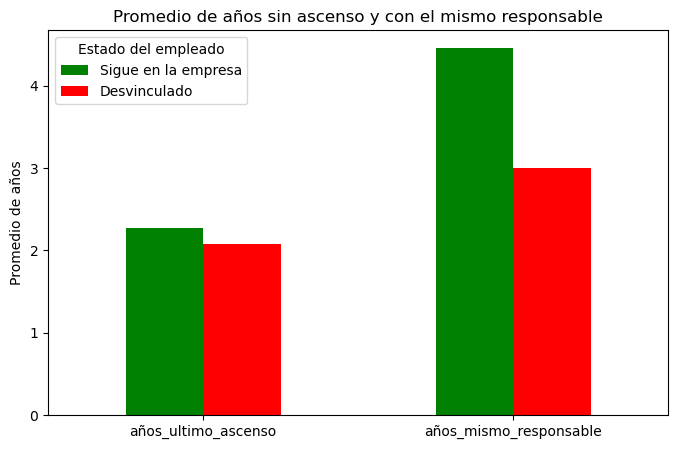

In [59]:
df_grouped = df.groupby('desvinculado')[['años_ultimo_ascenso', 'años_mismo_responsable']].mean().T
# Renombrar columnas para claridad
df_grouped.columns = ['Sigue en la empresa', 'Desvinculado']
# Gráfico de barras
df_grouped.plot(kind='bar', figsize=(8, 5), color=['green', 'red'])
plt.title('Promedio de años sin ascenso y con el mismo responsable')
plt.ylabel('Promedio de años')
plt.xticks(rotation=0)
plt.legend(title='Estado del empleado')
plt.show()

 4. ¿Hay perfiles tipo de desvinculación? (clustering opcional) (ALMU)

* Consulta: ¿Podemos agrupar empleados por comportamiento y ver quiénes se van?
* Variables sugeridas para cluster: edad, nivel_estudios, formaciones_ultimo_año, nivel_satisfaccion_trabajo, etc.
* ✅ Gráfico sugerido:
    * PCA + Scatterplot (si haces clustering con KMeans) coloreado por desvinculado.
    * Dendrograma (si haces clustering jerárquico).



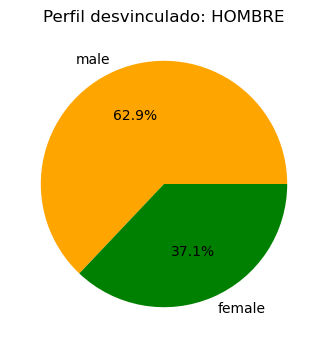

In [74]:
#En función del género:
# Filtrar el DataFrame para obtener solo los empleados desvinculados
df_filtrado = df[df['desvinculado'] == "Yes"]
# Calcular el porcentaje de cada género
porcentaje_por_genero = df_filtrado['genero'].value_counts(normalize=True) * 100
# Crear el gráfico de pastel
plt.figure(figsize=(4, 4))
plt.pie(porcentaje_por_genero, labels=porcentaje_por_genero.index, autopct='%1.1f%%', colors=['orange', 'green'])
plt.title("Perfil desvinculado: HOMBRE")
plt.show()

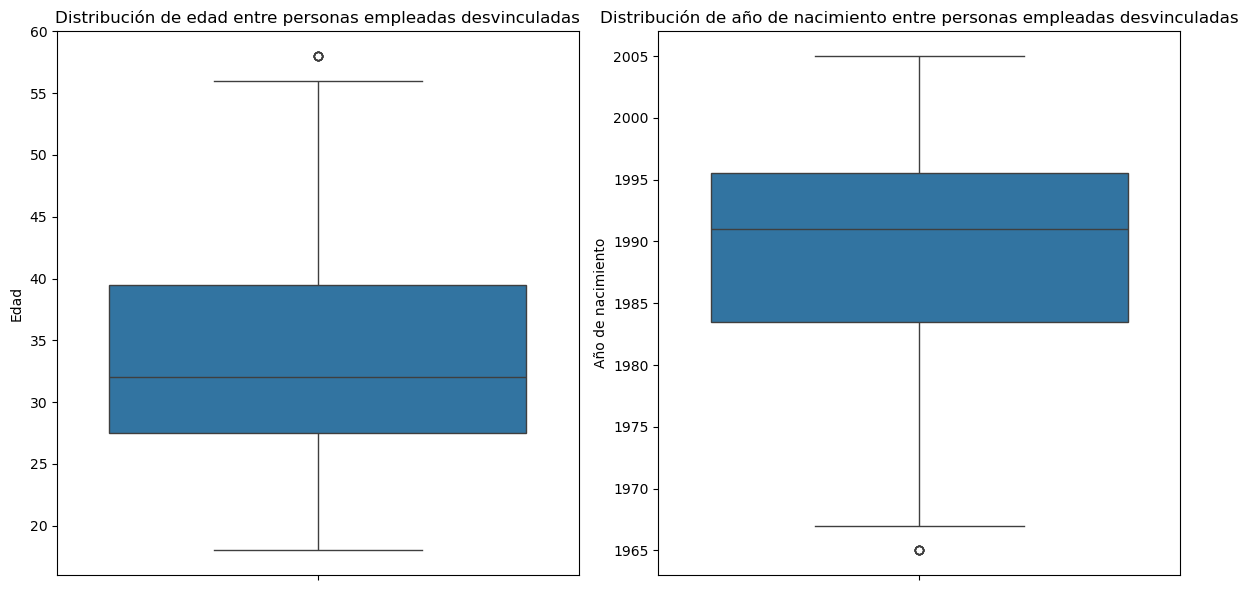

In [75]:
#En función de la edad y el año de nacimiento:
# Filtrar empleados desvinculados
df_filtrado = df[df['desvinculado'] == "Yes"]
# Crear la figura
plt.figure(figsize=(12, 6))
# Boxplot de la distribución de edad
plt.subplot(1, 2, 1)
sns.boxplot(y=df_filtrado['edad'])
plt.title("Distribución de edad entre personas empleadas desvinculadas")
plt.ylabel("Edad")
# Boxplot de la distribución de año de nacimiento
plt.subplot(1, 2, 2)
sns.boxplot(y=df_filtrado['año_nacimiento'])
plt.title("Distribución de año de nacimiento entre personas empleadas desvinculadas")
plt.ylabel("Año de nacimiento")
# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

desvinculado
numero_empleado                      0.007019
desvinculado                         1.000000
edad                                -0.149793
año_nacimiento                       0.149955
nivel_estudios                      -0.030692
distancia_domicilio                  0.029134
formaciones_ultimo_año              -0.051701
trabajos_anteriores                  0.043504
años_en_activo                      -0.129507
antigüedad_empresa                  -0.123064
años_ultimo_ascenso                 -0.022809
años_mismo_responsable              -0.149356
categoria                           -0.168115
evaluacion_desempeño                 0.003281
tarifa_hora                          0.003081
tarifa_diaria                       -0.062298
tarifa_mensual                       0.005629
ingreso_mensual                     -0.105384
%_incremento_salarial               -0.017515
acceso_acciones_empresa             -0.134142
nivel_compromiso                    -0.139064
nivel_satisfaccion_global           -0.108584
nivel_satisfaccion_trabajo          -0.099652
nivel_satisfaccion_relaciones       -0.036705
nivel_satisfaccion_conciliacion     -0.059254
horas_extras_percentil               0.170596

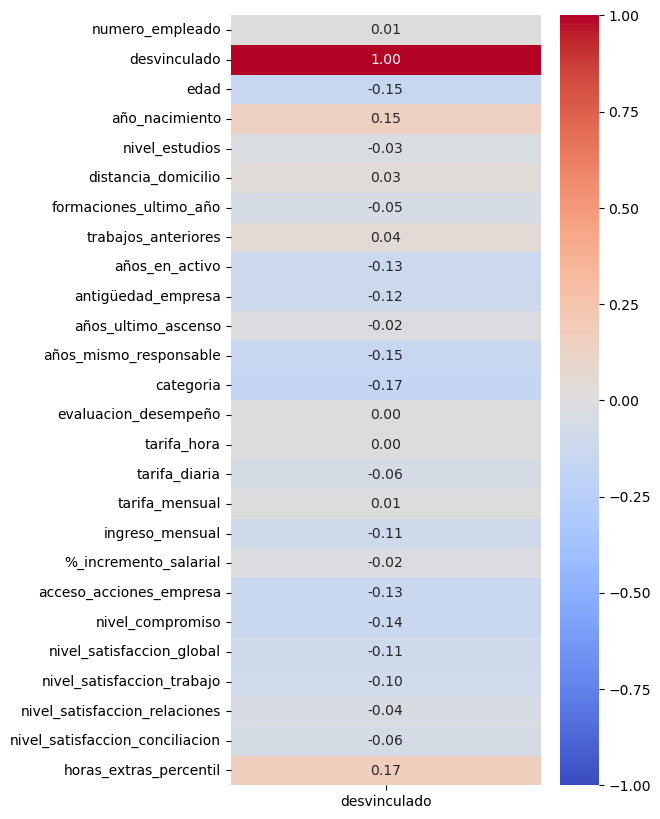

In [83]:
plt.figure(figsize = (5, 10))
sns.heatmap(df_correlation, annot = True,
            fmt = ".2f",
            cmap = "coolwarm",
            vmax = 1,
            vmin = -1)
df['desvinculado'] = df['desvinculado'].replace({'Yes': 1, 'No': 0}).astype(int)
df_correlation = df.select_dtypes(include="number").corr()[["desvinculado"]]
df_correlation

Text(0.5, 0, 'Variables')

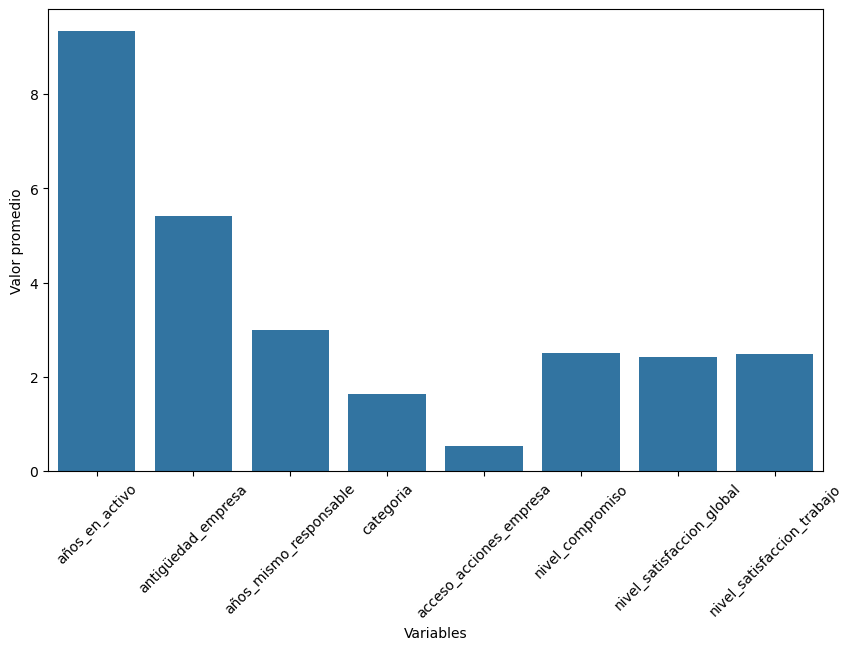

In [85]:
# Filtrar empleados desvinculados y calcular estadísticas
df_stats = df.query("desvinculado == 1")[['años_en_activo', 'antigüedad_empresa', 'años_mismo_responsable', 'categoria', 'acceso_acciones_empresa', 'nivel_compromiso',
       'nivel_satisfaccion_global', 'nivel_satisfaccion_trabajo']].describe().T
# Crear un gráfico de barras con las estadísticas
plt.figure(figsize=(10, 6))
sns.barplot(x=df_stats.index, y=df_stats["mean"])
plt.xticks(rotation=45)
x_labels= df_stats.index
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, ha='center')
plt.ylabel("Valor promedio")
plt.xlabel("Variables")

Text(0.5, 0, 'Variables')

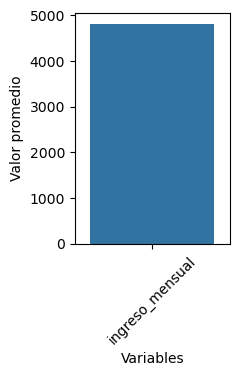

In [86]:
# Filtrar empleados desvinculados y calcular estadísticas
df_stats = df.query("desvinculado == 1")[['ingreso_mensual']].describe().T
# Crear un gráfico de barras con las estadísticas
plt.figure(figsize=(2, 3))
sns.barplot(x=df_stats.index, y=df_stats["mean"])
plt.xticks(rotation=45)
x_labels= df_stats.index
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, ha='center')
plt.ylabel("Valor promedio")
plt.xlabel("Variables")

📉 5. ¿Se van por falta de conciliación? (AURIS) 

* Consulta: ¿A menor conciliación, mayor fuga?
* Variables: nivel_satisfaccion_conciliacion, tipo_jornada, teletrabajo, desvinculado
* ✅ Gráfico sugerido:
    * Bar chart agrupado: conciliación vs. desvinculación, por tipo de jornada o modalidad de trabajo.
    * Boxplot: conciliación entre activos vs. desvinculados.



C:\Users\ceo\AppData\Local\Temp\ipykernel_35860\2814874914.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


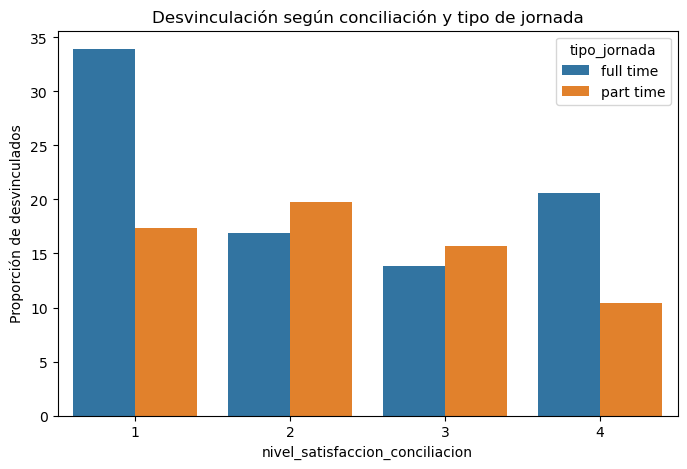

In [64]:
df = df.dropna(subset=['nivel_satisfaccion_conciliacion', 'desvinculado', 'tipo_jornada', 'teletrabajo'])
# Asegúrate de que las variables sean del tipo correcto
df['desvinculado'] = df['desvinculado'].replace({'Yes': 1, 'No': 0}).astype(int)
df['nivel_satisfaccion_conciliacion'] = pd.to_numeric(df['nivel_satisfaccion_conciliacion'], errors='coerce')
df['desvinculado'] = df['desvinculado'].astype(int)
# 1. Bar chart agrupado
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x='nivel_satisfaccion_conciliacion',
    y='desvinculado',
    hue='tipo_jornada',  # O usa 'teletrabajo'
    estimator=lambda x: sum(x)/len(x)*100,  # Proporción de desvinculados
    ci=None
)
plt.ylabel('Proporción de desvinculados')
plt.title('Desvinculación según conciliación y tipo de jornada')
plt.show()


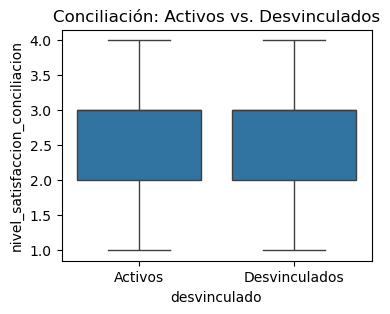

In [65]:
# 2. Boxplot
plt.figure(figsize=(4,3))
sns.boxplot(
    data=df,
    x='desvinculado',
    y='nivel_satisfaccion_conciliacion'
)
plt.xticks([0,1], ['Activos', 'Desvinculados'])
plt.title('Conciliación: Activos vs. Desvinculados')
plt.show()


💥 6. ¿Se quema el talento senior? (SILVIA)

* Consulta: ¿Se van quienes llevan muchos años sin ascender?
* Variables: años_en_activo, antigüedad_empresa, años_ultimo_ascenso, desvinculado
* ✅ Gráfico sugerido:
    * Scatterplot 3D (si quieres sorprender): eje X = antigüedad, eje Y = ascenso, color = desvinculado.
        * Bar chart: porcentaje de desvinculados según tramos de antigüedad y promociones.



C:\Users\ceo\AppData\Local\Temp\ipykernel_35860\1958285144.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="desvinculado", y=col, ax=axes[i], palette="Set2")
C:\Users\ceo\AppData\Local\Temp\ipykernel_35860\1958285144.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["No", "Sí"])  # opcional, para que sea más claro
C:\Users\ceo\AppData\Local\Temp\ipykernel_35860\1958285144.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="desvinculado", y=col, ax=axes[i], palette="Set2")
C:\Users\ceo\AppData\Local\Temp\ipykernel_35860\1958285144.py:10: UserWarning: set

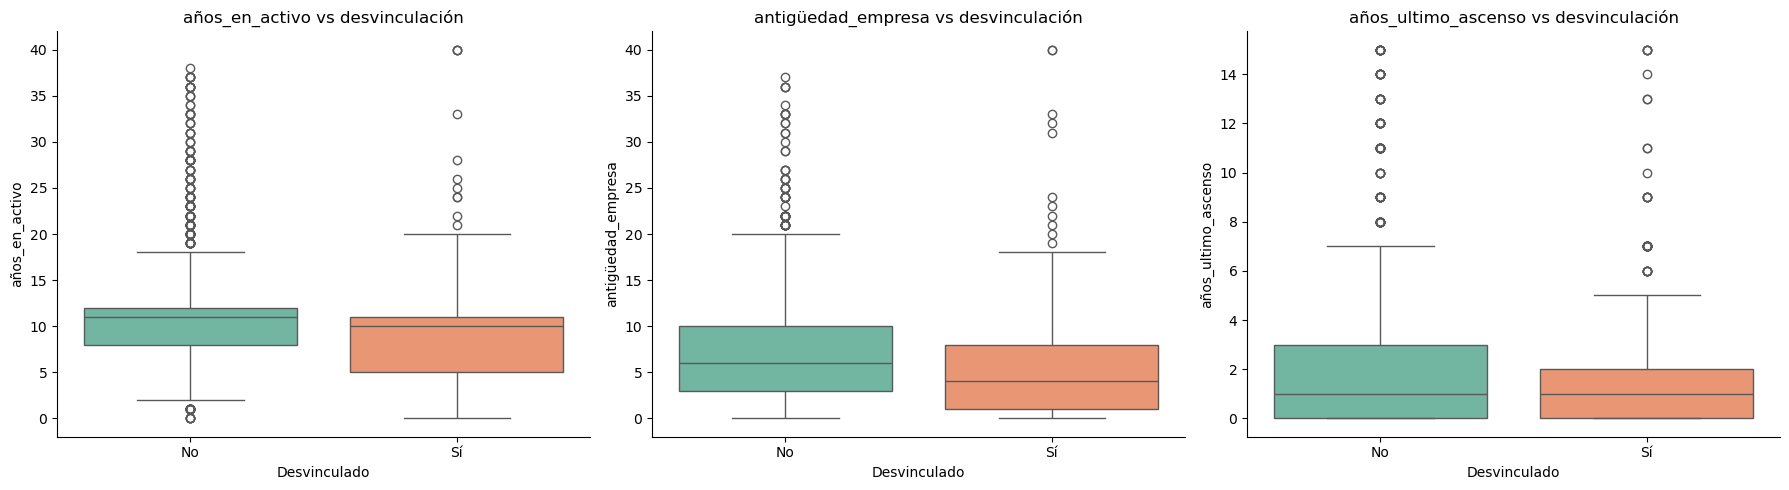

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

columnas = ["años_en_activo", "antigüedad_empresa", "años_ultimo_ascenso"]

for i, col in enumerate(columnas):
    sns.boxplot(data=df, x="desvinculado", y=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f'{col} vs desvinculación')
    axes[i].set_xlabel("Desvinculado")
    axes[i].set_ylabel(col)
    axes[i].set_xticklabels(["No", "Sí"])  # opcional, para que sea más claro
    axes[i].spines[['right', 'top']].set_visible(False)

plt.tight_layout()
plt.show()

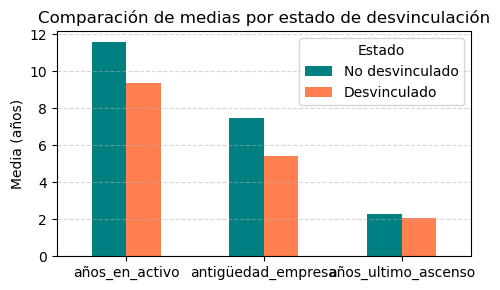

In [67]:
medias = df.groupby("desvinculado")[["años_en_activo", "antigüedad_empresa", "años_ultimo_ascenso"]].mean().T
medias.columns = ["No desvinculado", "Desvinculado"]

medias.plot(kind='bar', figsize=(5,3), color=["teal", "coral"])

plt.title("Comparación de medias por estado de desvinculación")
plt.ylabel("Media (años)")
plt.xticks(rotation=0)
plt.legend(title="Estado", loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

🧩 7. ¿Qué pesa más para irse: emoción o racionalidad? (LUCIA)

* Consulta: Comparar impacto de factores emocionales vs. racionales.
* Variables:
    * Emocionales: nivel_satisfaccion_conciliacion, nivel_satisfaccion_relaciones
    * Racionales: salario, formaciones, ascensos
* ✅ Gráfico sugerido: decidir qué gráfico es el más apto para plasmar esta consulta. 
    * Bar chart comparativo con impacto de cada variable en la tasa de desvinculación.

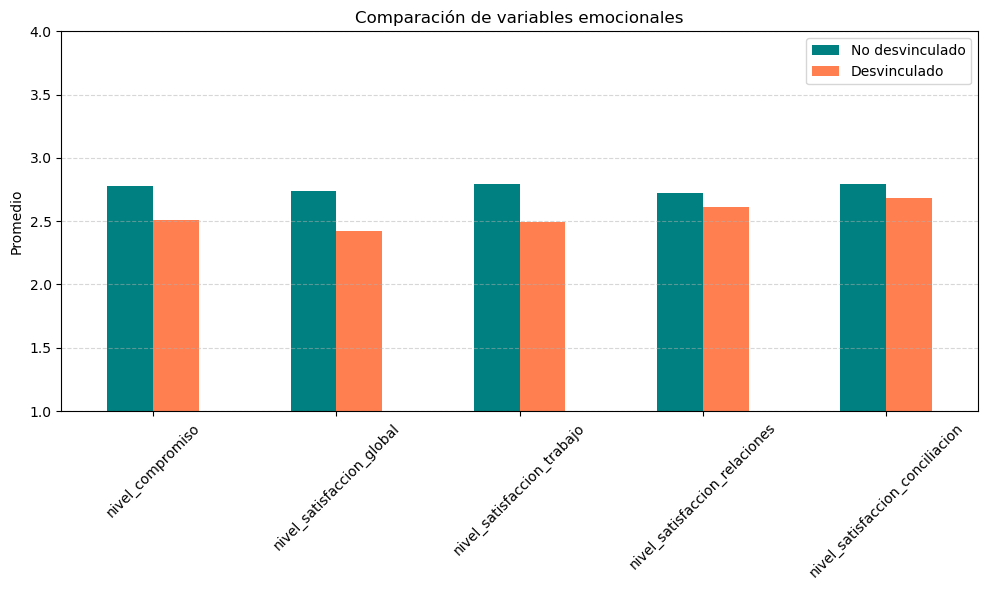

In [68]:
variables_emocionales = ['nivel_compromiso', 'nivel_satisfaccion_global', 'nivel_satisfaccion_trabajo', 'nivel_satisfaccion_relaciones','nivel_satisfaccion_conciliacion']
df_emocionales = (df.groupby('desvinculado')[variables].mean()).round(2).T
df_emocionales.columns = ["No desvinculado", "Desvinculado"]

df_emocionales.plot(kind='bar', figsize=(10,6), color=["teal", "coral"])

plt.title("Comparación de variables emocionales")
plt.ylabel("Promedio")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim([1,4])
plt.show()

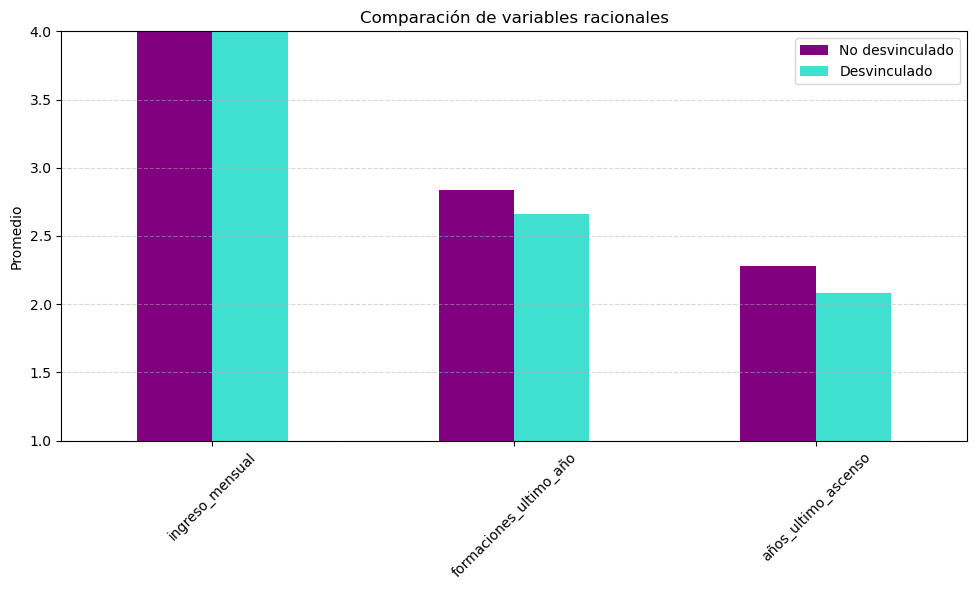

In [87]:
variables_racionales = ['ingreso_mensual', 'formaciones_ultimo_año','años_ultimo_ascenso']
df_racionales = (df.groupby('desvinculado')[variables_racionales].mean()).round(2).T
df_racionales.columns = ["No desvinculado", "Desvinculado"]
df_racionales.plot(kind='bar', figsize=(10,6), color=["purple", "turquoise"])
plt.title("Comparación de variables racionales")
plt.ylabel("Promedio")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim([1,4])
plt.show()

In [19]:
numericas = df.select_dtypes(include="number").columns
df_correlation = df[numericas].corr()
df_correlation

numero_empleado      edad  año_nacimiento  \
numero_empleado                         1.000000  0.001270       -0.001161   
edad                                    0.001270  1.000000       -0.999907   
año_nacimiento                         -0.001161 -0.999907        1.000000   
nivel_estudios                          0.023522  0.201159       -0.201536   
distancia_domicilio                     0.023438 -0.014098        0.014129   
formaciones_ultimo_año                  0.032204 -0.031561        0.031776   
trabajos_anteriores                    -0.035173  0.289232       -0.289166   
años_en_activo                         -0.019806  0.555545       -0.555960   
antigüedad_empresa                     -0.042063  0.314031       -0.313718   
años_ultimo_ascenso                    -0.030221  0.217460       -0.217243   
años_mismo_responsable                 -0.037282  0.195964       -0.195674   
categoria                              -0.023853  0.507723       -0.507748   
evaluacion_desempeño                   -0.002556  0.000597       -0.000464   
tarifa_hora                             0.012930  0.012125       -0.011937   
tarifa_diaria                          -0.026208 -0.006517        0.006083   
tarifa_mensual                         -0.003821  0.031335       -0.031665   
ingreso_mensual                        -0.046096  0.329297       -0.329182   
%_incremento_salarial                  -0.002470  0.007022       -0.006728   
acceso_acciones_empresa                 0.031389  0.039722       -0.039405   
nivel_compromiso                       -0.026428  0.036440       -0.036568   
nivel_satisfaccion_global               0.015803  0.003602       -0.003697   
nivel_satisfaccion_trabajo             -0.020900 -0.010496        0.010725   
nivel_satisfaccion_relaciones          -0.014537  0.056127       -0.056541   
nivel_satisfaccion_conciliacion         0.021771 -0.025662        0.026052   

                                 nivel_estudios  distancia_domicilio  \
numero_empleado                        0.023522         2.343815e-02   
edad                                   0.201159        -1.409840e-02   
año_nacimiento                        -0.201536         1.412934e-02   
nivel_estudios                         1.000000        -1.176014e-02   
distancia_domicilio                   -0.011760         1.000000e+00   
formaciones_ultimo_año                -0.039725        -5.616034e-02   
trabajos_anteriores                    0.116021         1.993364e-02   
años_en_activo                         0.123757        -2.480485e-02   
antigüedad_empresa                     0.070010        -2.031226e-02   
años_ultimo_ascenso                    0.064238        -1.967768e-02   
años_mismo_responsable                 0.068201        -1.220759e-02   
categoria                              0.100346         7.055896e-07   
evaluacion_desempeño                  -0.035674         2.455646e-02   
tarifa_hora                            0.010845         1.961561e-04   
tarifa_diaria                          0.000798        -2.296323e-02   
tarifa_mensual                        -0.028044        -7.883545e-03   
ingreso_mensual                        0.050048        -5.018183e-02   
%_incremento_salarial                 -0.009138         5.139427e-02   
acceso_acciones_empresa                0.012767         4.441186e-02   
nivel_compromiso                       0.043048         6.513818e-03   
nivel_satisfaccion_global             -0.042834         3.613696e-02   
nivel_satisfaccion_trabajo            -0.006928         2.813219e-02   
nivel_satisfaccion_relaciones         -0.017287        -5.638760e-03   
nivel_satisfaccion_conciliacion        0.021237        -3.347218e-02   

                                 formaciones_ultimo_año  trabajos_anteriores  \
numero_empleado                                0.032204            -0.035173   
edad                                          -0.031561             0.289232   
año_nacimiento                           

In [ ]:
df_mapacalor = df[['edad', 'nivel_estudios', 'trabajos_anteriores', 'años_en_activo','antigüedad_empresa', 'años_ultimo_ascenso', 'años_mismo_responsable', 'categoria',    'evaluacion_desempeño', 'ingreso_mensual', '%_incremento_salarial']]
valores = df_mapacalor.columns
df_correlation2 = df[valores].corr()
df_correlation2

edad  nivel_estudios  trabajos_anteriores  \
edad                    1.000000        0.201159             0.289232   
nivel_estudios          0.201159        1.000000             0.116021   
trabajos_anteriores     0.289232        0.116021             1.000000   
años_en_activo          0.555545        0.123757             0.211736   
antigüedad_empresa      0.314031        0.070010            -0.129465   
años_ultimo_ascenso     0.217460        0.064238            -0.045365   
años_mismo_responsable  0.195964        0.068201            -0.119690   
categoria               0.507723        0.100346             0.143060   
evaluacion_desempeño    0.000597       -0.035674            -0.005196   
ingreso_mensual         0.329297        0.050048             0.082793   
%_incremento_salarial   0.007022       -0.009138            -0.003378   

                        años_en_activo  antigüedad_empresa  \
edad                          0.555545            0.314031   
nivel_estudios                0.123757            0.070010   
trabajos_anteriores           0.211736           -0.129465   
años_en_activo                1.000000            0.517185   
antigüedad_empresa            0.517185            1.000000   
años_ultimo_ascenso           0.357317            0.611809   
años_mismo_responsable        0.379497            0.757118   
categoria                     0.625086            0.532415   
evaluacion_desempeño         -0.006627           -0.006677   
ingreso_mensual               0.415131            0.408272   
%_incremento_salarial        -0.034152           -0.041213   

                        años_ultimo_ascenso  años_mismo_responsable  \
edad                               0.217460                0.195964   
nivel_estudios                     0.064238                0.068201   
trabajos_anteriores               -0.045365               -0.119690   
años_en_activo                     0.357317                0.379497   
antigüedad_empresa                 0.611809                0.757118   
años_ultimo_ascenso                1.000000                0.500933   
años_mismo_responsable             0.500933                1.000000   
categoria                          0.342889                0.365260   
evaluacion_desempeño               0.023926                0.013746   
ingreso_mensual                    0.230145                0.234629   
%_incremento_salarial             -0.022511               -0.010821   

                        categoria  evaluacion_desempeño  ingreso_mensual  \
edad                     0.507723              0.000597         0.329297   
nivel_estudios           0.100346             -0.035674         0.050048   
trabajos_anteriores      0.143060             -0.005196         0.082793   
años_en_activo           0.625086             -0.006627         0.415131   
antigüedad_empresa       0.532415             -0.006677         0.408272   
años_ultimo_ascenso      0.342889              0.023926         0.230145   
años_mismo_responsable   0.365260              0.013746         0.234629   
categoria                1.000000             -0.025861         0.651918   
evaluacion_desempeño    -0.025861              1.000000        -0.026109   
ingreso_mensual          0.651918             -0.026109         1.000000   
%_incremento_salarial   -0.041995              0.721070        -0.008623   

                        %_incremento_salarial  
edad                                 0.007022  
nivel_estudios                      -0.009138  
trabajos_anteriores                 -0.003378  
años_en_activo                      -0.034152  
antigüedad_empresa                  -0.041213  
años_ultimo_ascenso                 -0.022511  
años_mismo_responsable              -0.010821  
categoria                           -0.041995  
evaluacion_desempeño                 0.721070  
ingreso_mensual                     -0.008623  
%_incremento_salarial                1.000000

Text(70.5815972222222, 0.5, 'Nombre del eje Y')

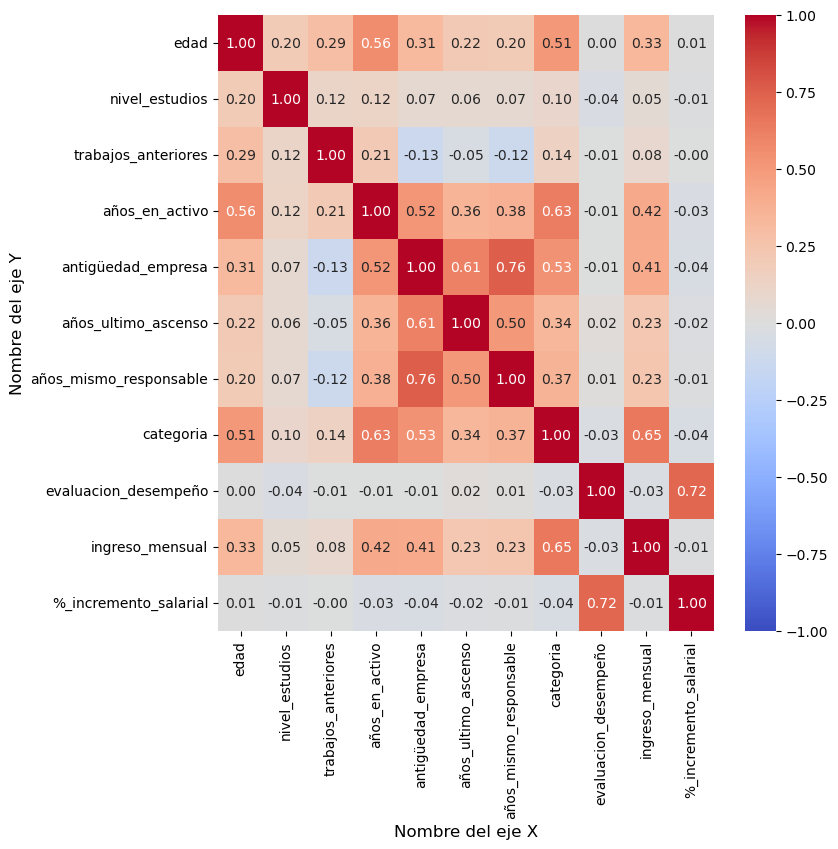

In [38]:
plt.figure(figsize = (8, 8))
sns.heatmap(df_correlation2, # creamos un heatmap con la máscara
            annot = True, 
            fmt = ".2f", 
            cmap = "coolwarm", 
            vmax = 1, 
            vmin = -1, 
            ); 
plt.xlabel("Nombre del eje X", fontsize=12)
plt.ylabel("Nombre del eje Y", fontsize=12)


In [123]:
df_2 = df.groupby(["evaluacion_desempeño", "desvinculado"])["%_incremento_salarial"].mean()
df_2

evaluacion_desempeño  desvinculado
3                     0               14.179422
                      1               13.915179
4                     0               21.854749
                      1               22.085714
Name: %_incremento_salarial, dtype: float64

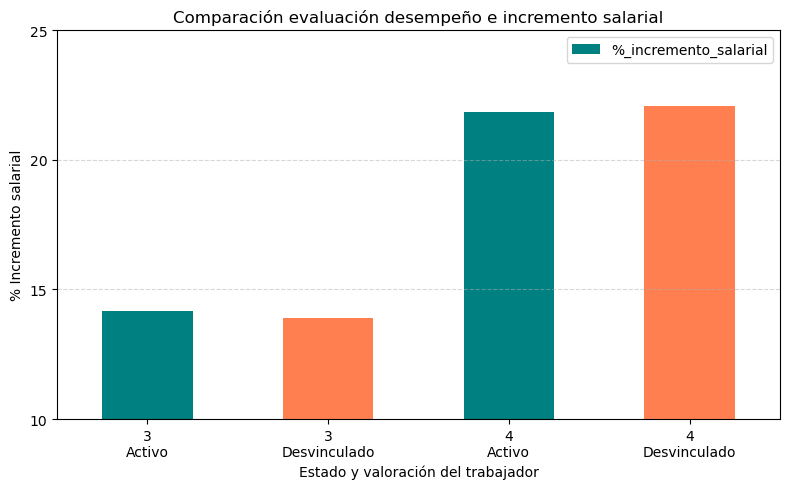

In [119]:
df_2.plot(kind='bar', figsize=(8,5), color=["teal", "coral"])

plt.title("Comparación evaluación desempeño e incremento salarial")
plt.ylabel("% Incremento salarial")
plt.xlabel("Estado y valoración del trabajador")
plt.xticks(
    ticks=[0, 1, 2, 3],  # las posiciones reales en el eje X (pueden variar según tu gráfico)
    labels=["3\nActivo", "3\nDesvinculado", "4\nActivo", "4\nDesvinculado"],
    rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(10, 25)
plt.gca().yaxis.set_major_locator(MultipleLocator(5)) 
plt.show()

In [125]:
df_3 = df.groupby(["evaluacion_desempeño"])["%_incremento_salarial"].mean()

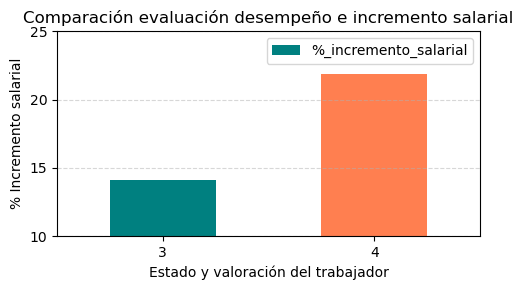

In [127]:
df_3.plot(kind='bar', figsize=(5,3), color=["teal", "coral"])

plt.title("Comparación evaluación desempeño e incremento salarial")
plt.ylabel("% Incremento salarial")
plt.xlabel("Estado y valoración del trabajador")
plt.xticks(
    ticks=[0, 1],  # las posiciones reales en el eje X (pueden variar según tu gráfico)
    labels=["3", "4"],
    rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(10, 25)
plt.gca().yaxis.set_major_locator(MultipleLocator(5)) 
plt.show()

In [47]:
df_mod = df.copy()


In [48]:
df_mod

numero_empleado desvinculado  genero  edad  año_nacimiento estado_civil  \
0                 162           No    male    51            1972        ns/nc   
1                 259           No    male    52            1971        ns/nc   
2                 319           No    male    42            1981      married   
3                   0           No  female    47            1976      married   
4                   0           No  female    46            1977     divorced   
5                1900           No  female    48            1975        ns/nc   
6                  81           No  female    59            1964        ns/nc   
7                 387           No    male    42            1981      married   
8                   0           No  female    41            1982      married   
9                 999           No    male    41            1982        ns/nc   
10               1035           No  female    41            1982        ns/nc   
11                  0           No    male    56            1967      married   
12                  0           No  female    38            1985      married   
13                 58          Yes  female    41            1982      married   
14                  0           No    male    55            1968       single   
15                558           No  female    40            1983        ns/nc   
16                825          Yes    male    58            1965       single   
17                  0           No  female    46            1977        ns/nc   
18                  0           No    male    35            1988      married   
19                  0           No  female    40            1983        ns/nc   
20               1712           No    male    45            1978        ns/nc   
21                 73           No  female    33            1990       single   
22                  0           No  female    36            1987     divorced   
23                820           No  female    47            1976      married   
24                  0           No    male    36            1987        ns/nc   
25                  0           No  female    35            1988      married   
26                  0          Yes  female    52            1971      married   
27               1294           No  female    36            1987       single   
28                  0           No    male    33            1990      married   
29               1774           No    male    34            1989        ns/nc   
30               1815           No  female    41            1982     divorced   
31               1993           No    male    47            1976        ns/nc   
32                 32           No  female    53            1970        ns/nc   
33                100           No    male    35            1988       single   
34                  0           No  female    34            1989       single   
35                244           No  female    46            1977     divorced   
36                327           No  female    43            1980      married   
37                373           No    male    36            1987      married   
38                  0           No  female    60            1963      married   
39                729           No    male    40            1983      married   
40                830           No  female    32            1991      married   
41                  0           No    male    41            1982       single   
42                981           No    male    53            1970     divorced   
43               1042          Yes  female    36            1987       single   
44               1080           No  female    46            1977     divorced   
45               1995           No    male    38            1985      married   
46                145           No  female    51            1972       single   
47                158           No    male    43            1980      married   
48                391           No  f

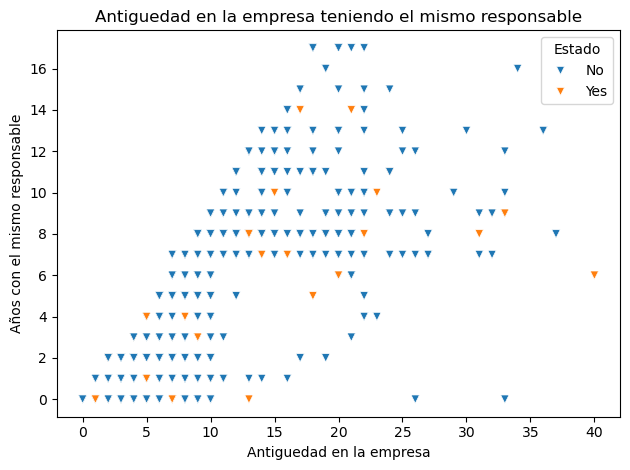

In [49]:
sns.scatterplot(x='antigüedad_empresa', y='años_mismo_responsable', data=df_mod,  color= ['cornflowerblue','gold'], marker='v', hue='desvinculado')

plt.title("Antiguedad en la empresa teniendo el mismo responsable")
plt.ylabel("Años con el mismo responsable")
plt.xlabel("Antiguedad en la empresa")
plt.legend(title='Estado')
plt.gca().yaxis.set_major_locator(MultipleLocator(2)) 
plt.tight_layout()
plt.show()

In [128]:
df.head()

numero_empleado  desvinculado  genero  edad  año_nacimiento estado_civil  \
0              162             0    male    51            1972        ns/nc   
1              259             0    male    52            1971        ns/nc   
2              319             0    male    42            1981      married   
3                0             0  female    47            1976      married   
4                0             0  female    46            1977     divorced   

   nivel_estudios    campo_estudios frecuencia_viaje  distancia_domicilio  \
0               3             ns/nc       non travel                    9   
1               4     Life Sciences       non travel                    1   
2               2  Technical Degree    travel rarely                    6   
3               4           Medical    travel rarely                    3   
4               3  Technical Degree       non travel                    4   

  teletrabajo tipo_jornada  formaciones_ultimo_año  trabajos_anteriores  \
0         yes    full time                       5                    7   
1         yes    full time                       5                    0   
2         yes    full time                       3                    1   
3          no    full time                       2                    3   
4          no    full time                       5                    2   

   años_en_activo  antigüedad_empresa  años_ultimo_ascenso  \
0              11                  20                   15   
1              34                  33                   11   
2              22                  22                   11   
3              11                  20                    5   
4              11                  19                    2   

   años_mismo_responsable            departamento  categoria  \
0                      15             sin asignar          5   
1                       9             sin asignar          5   
2                      15  research & development          5   
3                       6             sin asignar          4   
4                       8             sin asignar          4   

              puesto horas_extras  evaluacion_desempeño  tarifa_hora  \
0  research director           No                     3         51.0   
1            manager           No                     3         65.0   
2            manager           No                     3         58.0   
3  research director           No                     3         82.0   
4    sales executive           No                     3         45.0   

   tarifa_diaria  tarifa_mensual  ingreso_mensual  %_incremento_salarial  \
0          684.0          6462.0          19537.0                     13   
1          699.0          5678.0          19999.0                     14   
2          532.0          4933.0          19232.0                     11   
3          359.0         26703.0          17169.0                     19   
4         1319.0          7739.0           4859.0                     12   

   acceso_acciones_empresa  nivel_compromiso  nivel_satisfaccion_global  \
0                        0                 3                          1   
1                        1                 2                          3   
2                        0                 3                          3   
3                        2                 3                          1   
4                        1                 4                          1   

   nivel_satisfaccion_trabajo  nivel_satisfaccion_relaciones  \
0                           3                              3   
1                           3                              1   
2                           4                              4   
3                           3                              2   
4                           1                              4   

   nivel_satisfaccion_conciliacion  
0                                3  
1                                3  
2                  

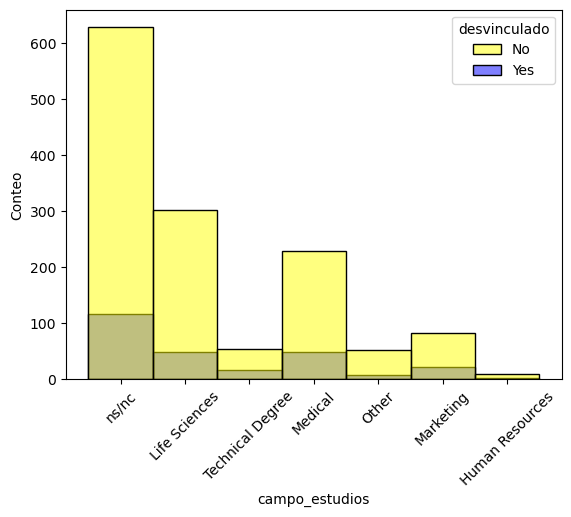

In [62]:
sns.histplot(x = "campo_estudios", 
             data = df, 
             palette = ["yellow", "blue"], 
             hue = "desvinculado" )
plt.xlabel("campo_estudios")
plt.ylabel("Conteo")
plt.xticks(rotation = 45);

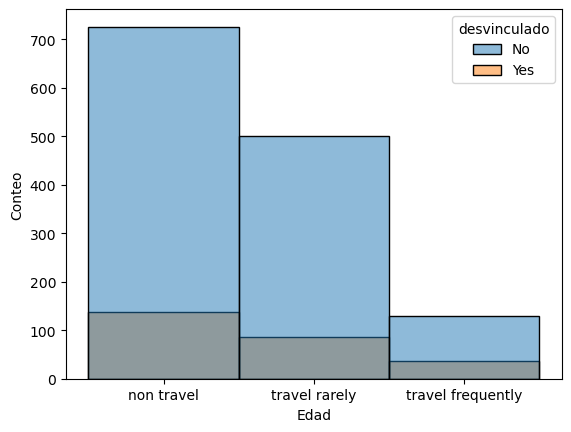

In [ ]:
sns.histplot(x = "frecuencia_viaje", 
             data = df, 
             color = "violet", 
             hue = "desvinculado" )
plt.xlabel("frecuencia_viaje")
plt.ylabel("Conteo");


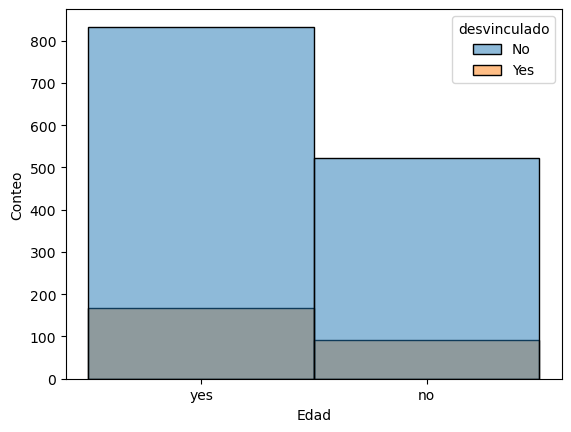

In [ ]:
sns.histplot(x = "teletrabajo", 
             data = df, 
             color = "violet", 
             hue = "desvinculado" )
plt.xlabel("teletrabajo")
plt.ylabel("Conteo");

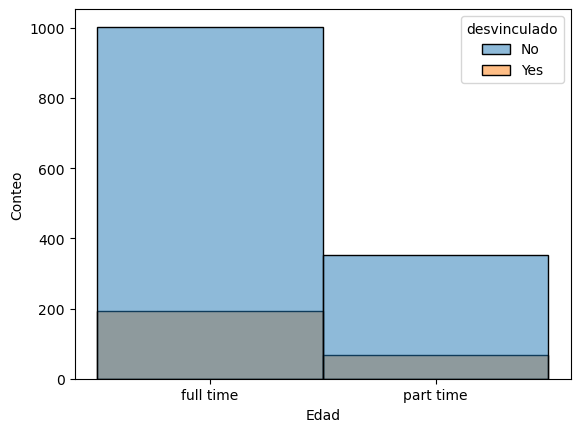

In [ ]:
sns.histplot(x = "tipo_jornada", 
             data = df, 
             color = "violet", 
             hue = "desvinculado" )
plt.xlabel("tipo_jornada")
plt.ylabel("Conteo");


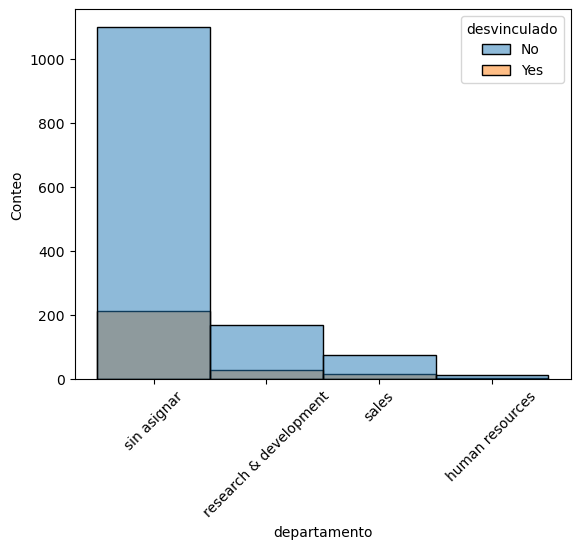

In [64]:
sns.histplot(x = "departamento", 
             data = df, 
             color = "violet", 
             hue = "desvinculado" )
plt.xlabel("departamento")
plt.ylabel("Conteo")
plt.xticks(rotation = 45);

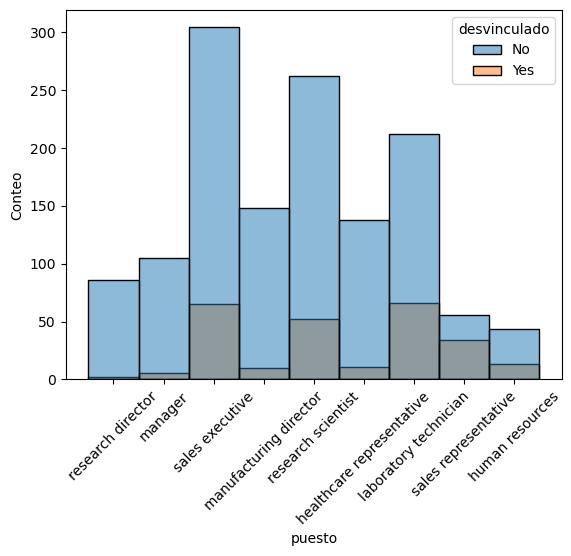

In [65]:
sns.histplot(x = "puesto", 
             data = df, 
             color = "violet", 
             hue = "desvinculado" )
plt.xlabel("puesto")
plt.ylabel("Conteo")
plt.xticks(rotation = 45);

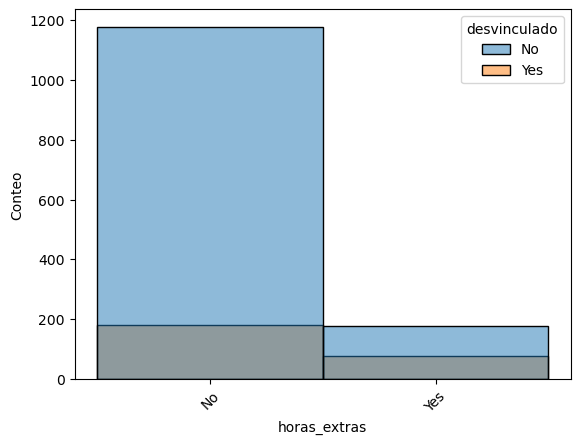

In [66]:
sns.histplot(x = "horas_extras", 
             data = df, 
             color = "violet", 
             hue = "desvinculado" )
plt.xlabel("horas_extras")
plt.ylabel("Conteo")
plt.xticks(rotation = 45);

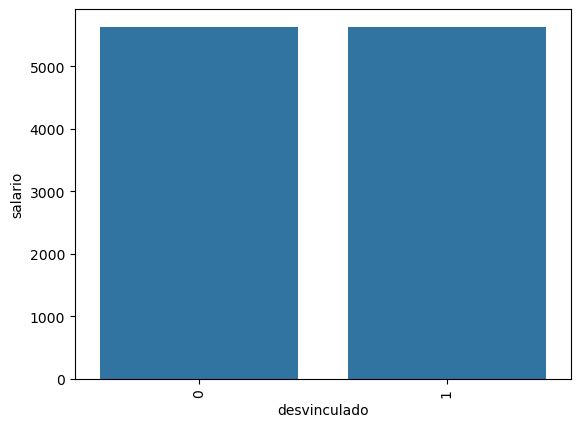

In [88]:
sns.barplot(x = "desvinculado", y = df["ingreso_mensual"].mean(), data = df)
plt.ylabel("salario")
plt.xlabel("desvinculado")
plt.xticks(rotation=90);